In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df0 = pd.read_csv("/content/inflacao.csv")
df = df0.copy()

In [ ]:
df.head(n=5)

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo,consolidado_ano
0,1980-01,1980,1,198001,6.62,6.62,0.0,0.0,0.0,0.0,...,4.48,4.70,4.70,0.0,0.0,0.0,0.0,0.0,2932.8,False
1,1980-02,1980,2,198002,4.62,11.54,0.0,0.0,0.0,0.0,...,7.83,9.53,14.23,0.0,0.0,0.0,0.0,0.0,2932.8,False
2,1980-03,1980,3,198003,6.04,18.27,0.0,0.0,0.0,0.0,...,12.17,12.80,27.03,0.0,0.0,0.0,0.0,0.0,2932.8,False
3,1980-04,1980,4,198004,5.29,24.53,0.0,0.0,0.0,0.0,...,16.10,3.13,30.16,0.0,0.0,0.0,0.0,0.0,2932.8,False
4,1980-05,1980,5,198005,5.70,31.63,0.0,0.0,0.0,0.0,...,22.62,4.86,35.02,0.0,0.0,0.0,0.0,0.0,4149.6,False


In [ ]:
df.tail(n=5)

,referencia,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,...,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo,consolidado_ano
516,2023-01,2023,1,202301,0.53,0.53,5.77,0.55,0.55,5.87,...,0.63,0.46,0.46,0.32,0.32,13.75,13.65,7.45,1302.0,False
517,2023-02,2023,2,202302,0.84,1.37,5.60,0.76,1.31,5.63,...,1.06,0.05,0.51,0.21,0.53,13.75,13.65,7.62,1302.0,False
518,2023-03,2023,3,202303,0.71,2.09,4.65,0.69,2.01,5.36,...,1.45,0.30,0.81,0.18,0.71,13.75,13.65,8.60,1302.0,False
519,2023-04,2023,4,202304,0.61,2.72,4.18,0.57,2.59,4.16,...,1.88,0.14,0.95,0.23,0.94,13.75,13.65,9.09,1302.0,False
520,2023-05,2023,5,202305,0.23,2.95,3.94,0.51,3.12,4.07,...,2.08,0.59,1.54,0.40,1.34,13.75,13.65,9.34,1320.0,False


In [ ]:
df.describe()

,ano,mes,ano_mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,ipca15_variacao,ipca15_acumulado_ano,ipca15_acumulado_doze_meses,inpc_variacao,...,ipc_fipe_variacao,ipc_fipe_acumulado_ano,incc_variacao,incc_acumulado_ano,incc_m_variacao,incc_m_acumulado_ano,selic_meta,selic_ano,juros_reais,salario_minimo
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,...,521.000000,521.000000,521.000000,521.00000,521.000000,521.000000,521.000000,521.000000,521.000000,5.210000e+02
mean,2001.211132,6.466411,200127.579655,5.886507,95.414088,306.575374,0.273570,1.863455,3.401420,5.875278,...,5.725624,38.408234,6.039923,41.47096,3.794664,25.453954,7.886296,1422.053359,47.515010,5.480391e+04
std,12.546895,3.458452,1254.635798,10.814444,264.626538,860.333031,0.392111,2.407386,3.799063,10.820572,...,10.731444,72.435133,11.172180,73.49744,10.224419,67.269566,8.091723,19466.456189,519.768702,3.238058e+05
min,1980.000000,1.000000,198001.000000,-0.680000,-0.160000,0.000000,-0.730000,0.000000,0.000000,-0.600000,...,-1.000000,-1.790000,-0.500000,0.31000,0.000000,0.000000,0.000000,0.000000,-97.500000,5.437000e+01
25%,1990.000000,3.000000,199011.000000,0.380000,2.440000,5.240000,0.000000,0.000000,0.000000,0.390000,...,0.300000,1.920000,0.360000,2.78000,0.120000,0.400000,0.000000,7.260000,0.000000,2.494800e+02
50%,2001.000000,6.000000,200109.000000,0.770000,5.140000,7.710000,0.080000,0.670000,2.910000,0.780000,...,0.740000,4.740000,0.870000,6.51000,0.400000,3.290000,7.000000,13.900000,4.980000,7.240000e+02
75%,2012.000000,9.000000,201207.000000,6.820000,47.680000,146.350000,0.500000,3.260000,6.190000,6.710000,...,6.690000,38.340000,5.730000,41.96000,0.950000,7.260000,13.750000,27.110000,10.630000,3.600000e+03
max,2023.000000,12.000000,202305.000000,82.390000,2477.150000,6821.310000,3.050000,11.990000,17.240000,82.180000,...,79.110000,374.660000,78.410000,388.77000,72.480000,376.500000,45.000000,438898.830000,11448.680000,4.639800e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   referencia                   521 non-null    object 
 1   ano                          521 non-null    int64  
 2   mes                          521 non-null    int64  
 3   ano_mes                      521 non-null    int64  
 4   ipca_variacao                521 non-null    float64
 5   ipca_acumulado_ano           521 non-null    float64
 6   ipca_acumulado_doze_meses    521 non-null    float64
 7   ipca15_variacao              521 non-null    float64
 8   ipca15_acumulado_ano         521 non-null    float64
 9   ipca15_acumulado_doze_meses  521 non-null    float64
 10  inpc_variacao                521 non-null    float64
 11  inpc_acumulado_ano           521 non-null    float64
 12  inpc_acumulado_doze_meses    521 non-null    float64
 13  ipa_variacao        

In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: >

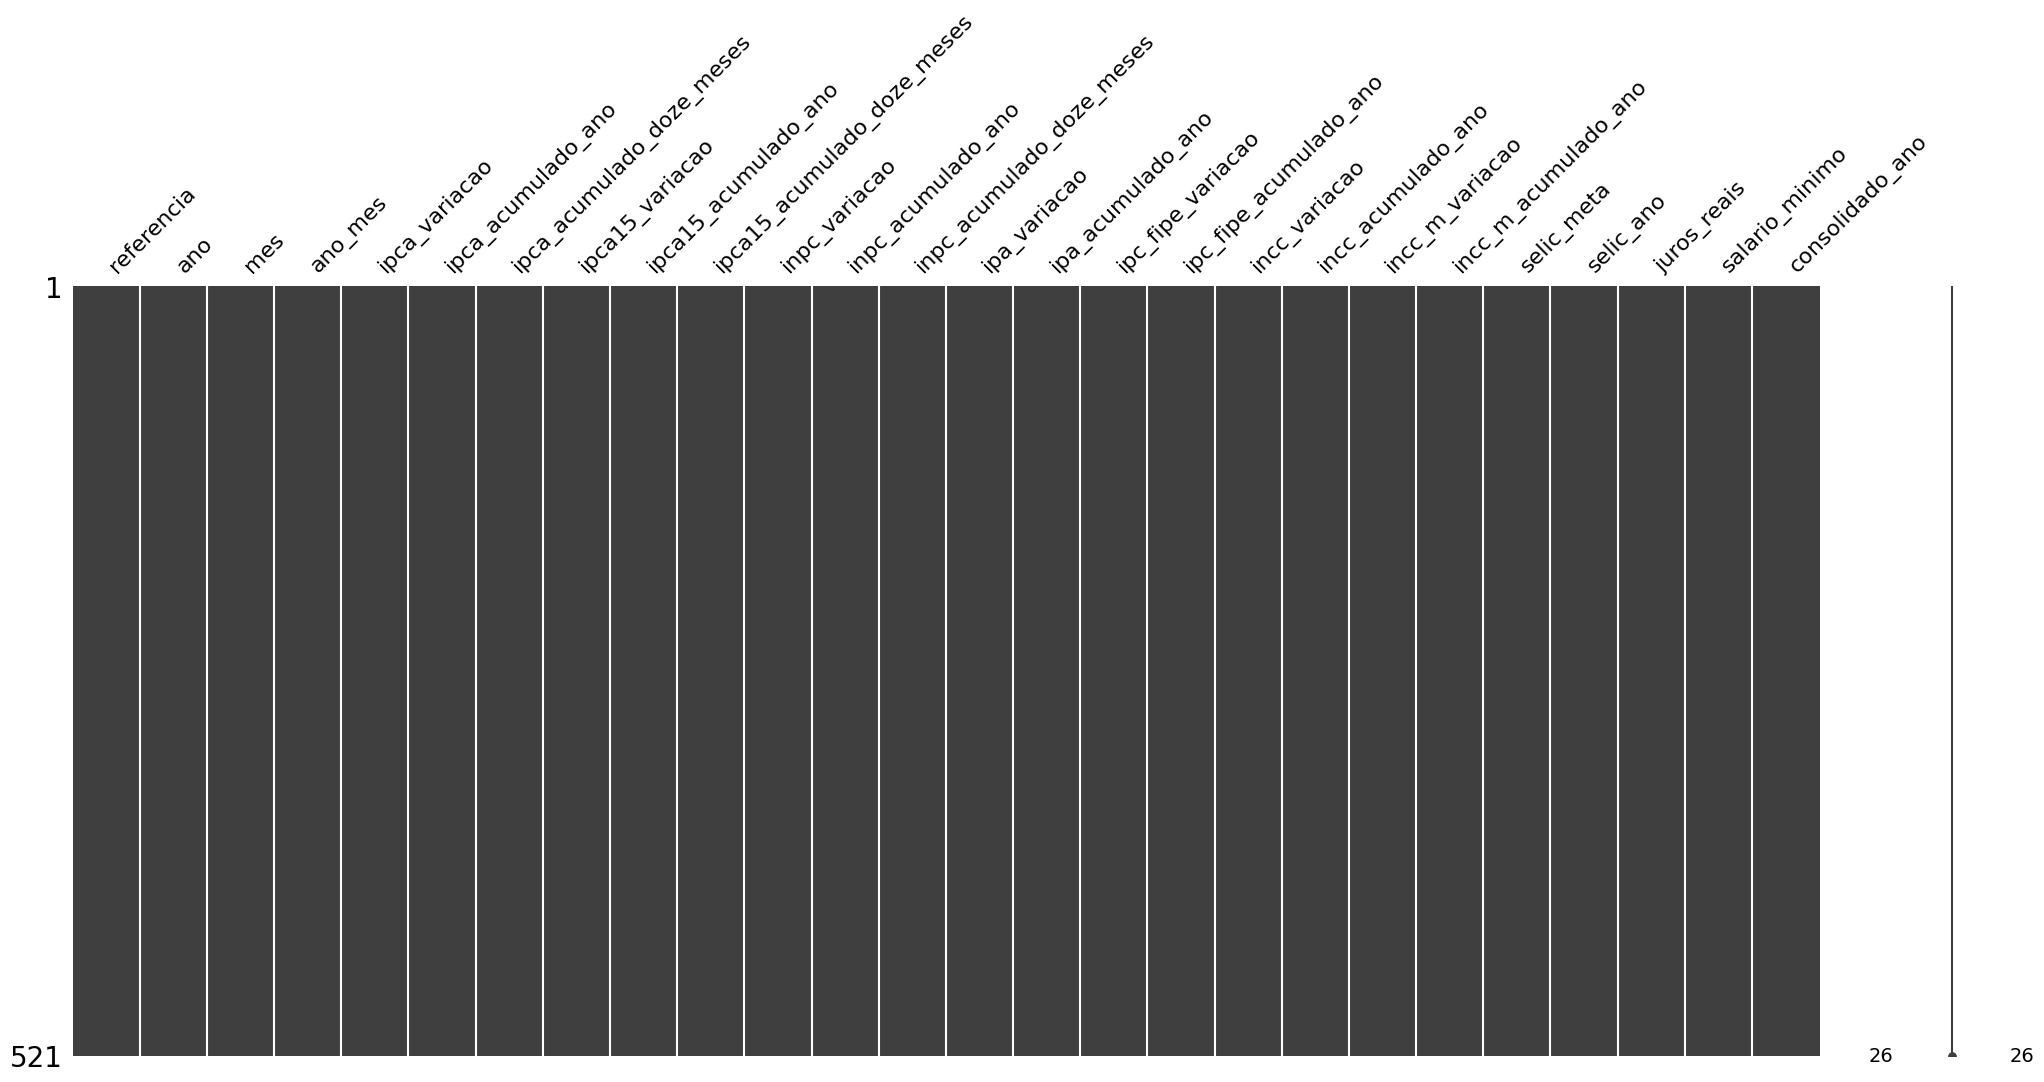

In [ ]:
msno.matrix(df)

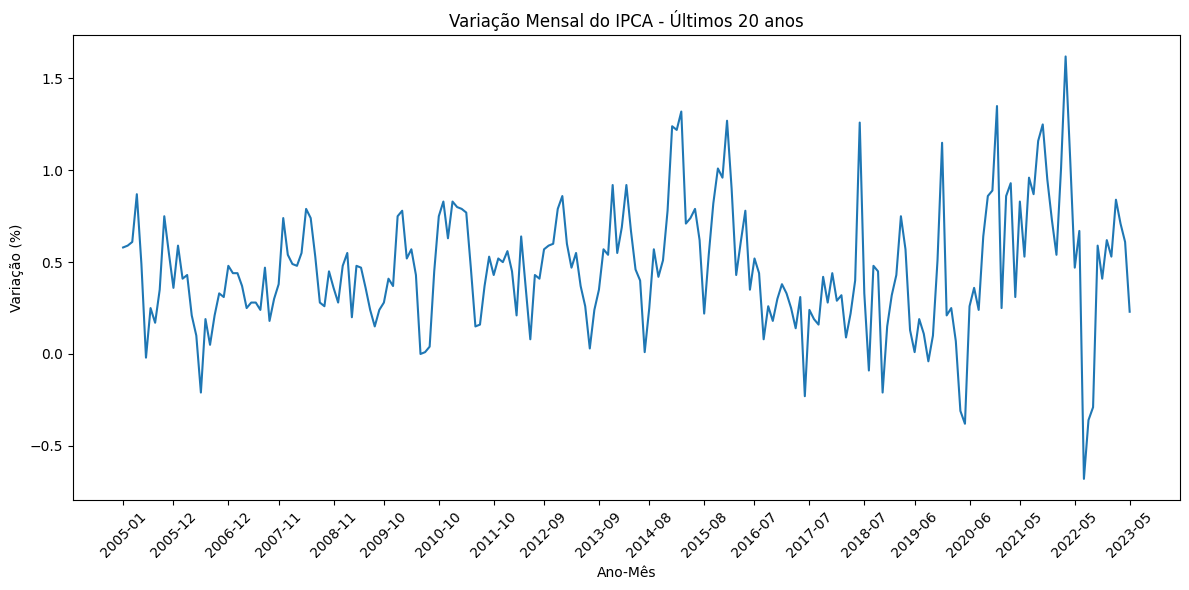

In [ ]:
df_ultimos_20_anos = df[df['ano'] >= 2005]

ticks = np.linspace(0, len(df_ultimos_20_anos)-1, 20, dtype=int)
plt.figure(figsize=(12, 6))
plt.plot(df_ultimos_20_anos['referencia'], df_ultimos_20_anos['ipca_variacao'])
plt.title('Variação Mensal do IPCA - Últimos 20 anos')
plt.xlabel('Ano-Mês')
plt.ylabel('Variação (%)')
plt.xticks(df_ultimos_20_anos['referencia'].iloc[ticks], rotation=45)
plt.tight_layout()
plt.show()

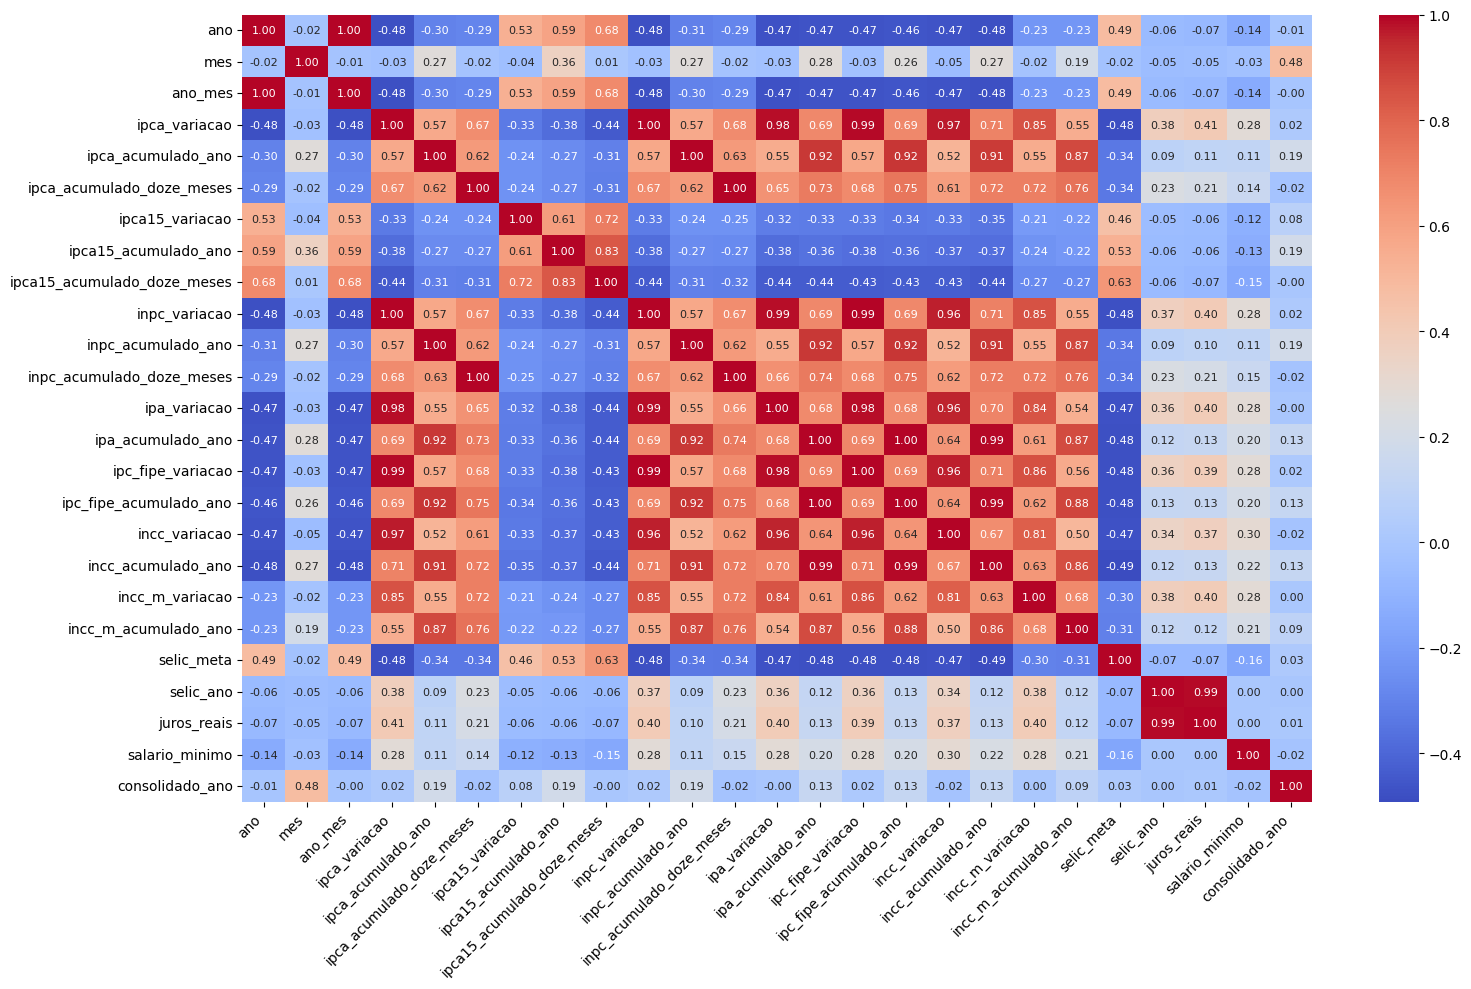

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size": 8}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-47-2356141715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ultimos_20_anos['data_ref'] = pd.to_datetime(df_ultimos_20_anos['ano'].astype(str) + '-' + df_ultimos_20_anos['mes'].astype(str).str.zfill(2))


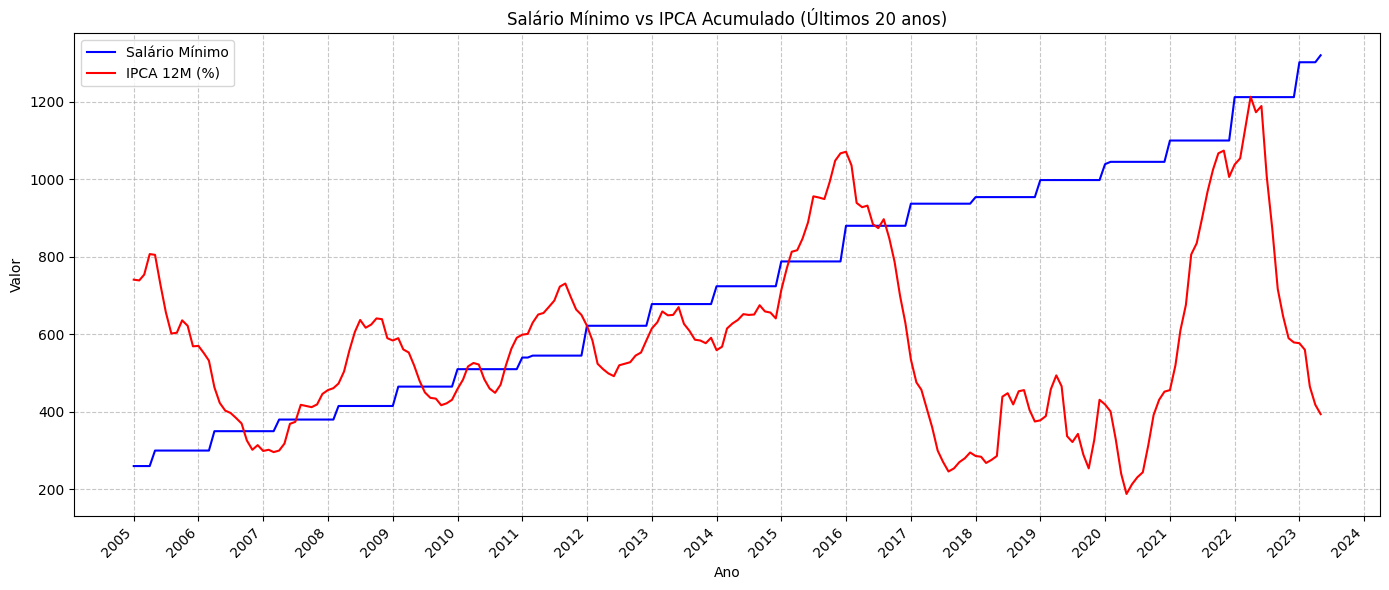

In [ ]:
ano_limite = df['ano'].max() - 20

df_ultimos_20_anos['data_ref'] = pd.to_datetime(df_ultimos_20_anos['ano'].astype(str) + '-' + df_ultimos_20_anos['mes'].astype(str).str.zfill(2))

plt.figure(figsize=(14, 6))

plt.plot(df_ultimos_20_anos['data_ref'], df_ultimos_20_anos['salario_minimo'], label='Salário Mínimo', color='blue')
plt.plot(df_ultimos_20_anos['data_ref'], df_ultimos_20_anos['ipca_acumulado_doze_meses'] * 100, label='IPCA 12M (%)', color='red')

plt.title('Salário Mínimo vs IPCA Acumulado (Últimos 20 anos)')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
df_ipca = pd.DataFrame(data=df.incc_variacao.values, index=df.referencia, columns=["value"])

In [ ]:
df_ipca.index = pd.to_datetime(df_ipca.index, format='%Y-%m')

In [ ]:
df_ipca = df_ipca[df_ipca.index >= "2005-01-01"]

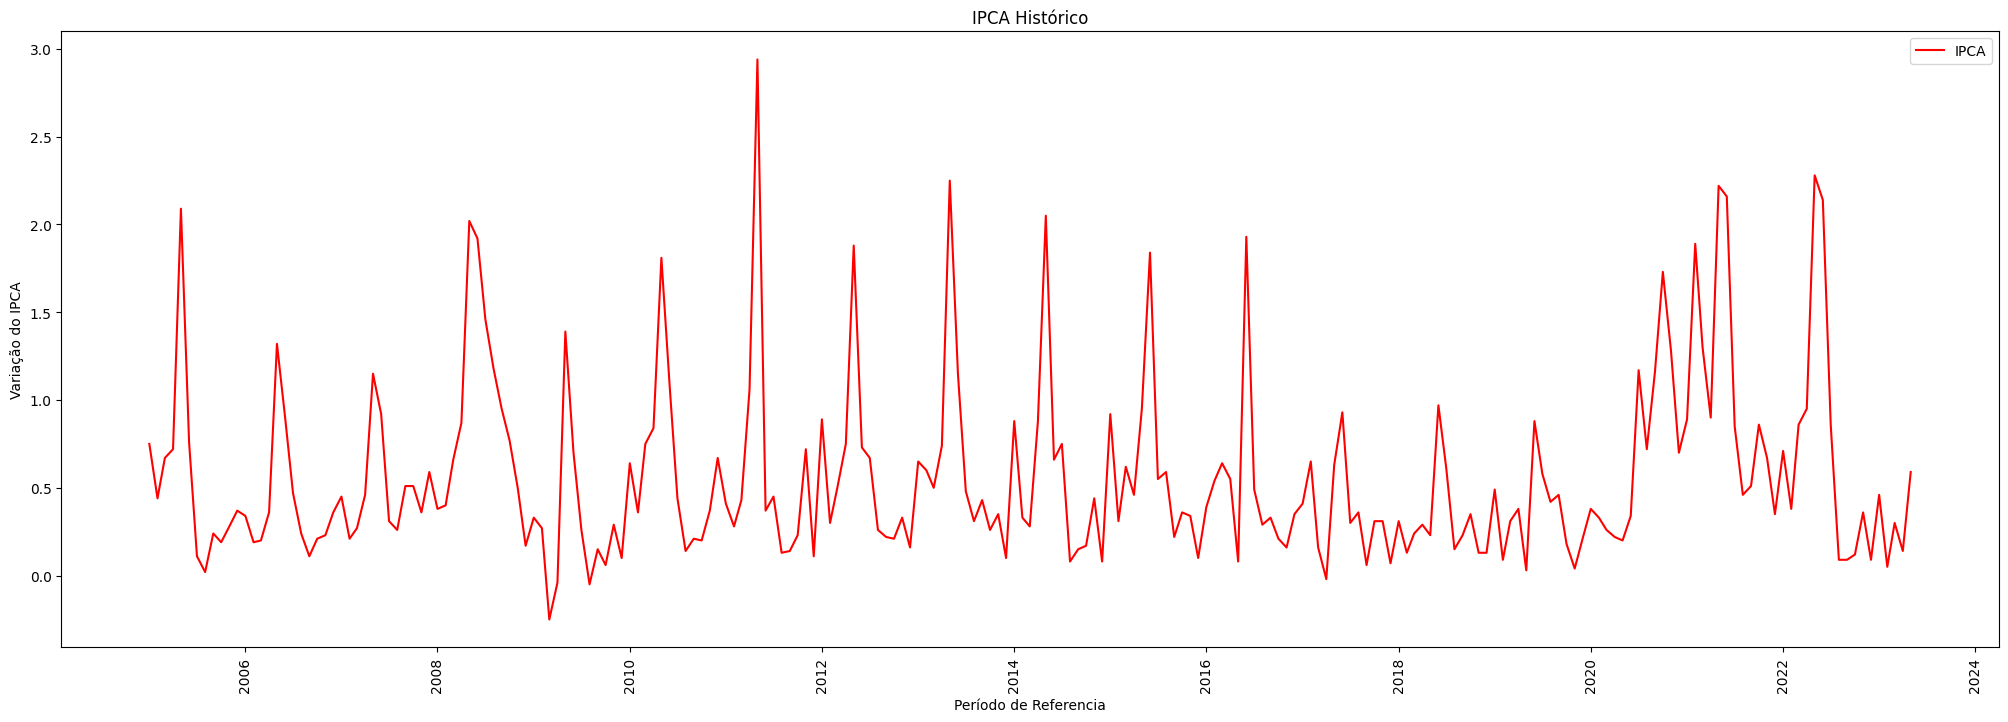

In [ ]:
plt.figure(figsize=(25, 8))
plt.plot(df_ipca, label="IPCA", color='red')

plt.xlabel("Período de Referencia")
plt.ylabel("Variação do IPCA")

plt.xticks(rotation=90)

plt.title("IPCA Histórico")
plt.legend()
plt.show()

RMSE Random Forest (Split Temporal): 0.2393


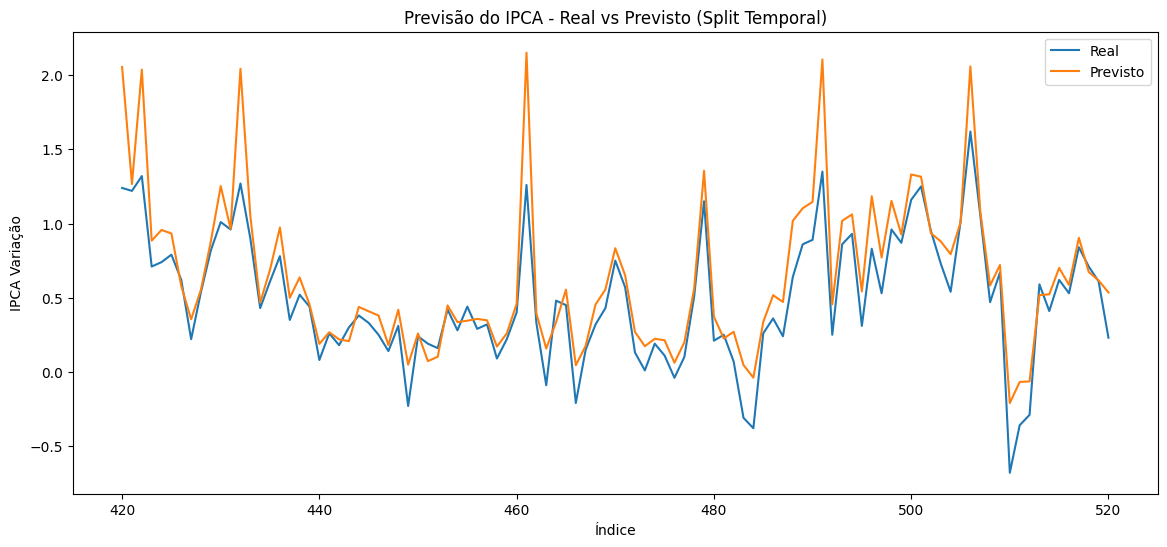

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = df.copy()
for lag in range(1, 4):
    df[f'ipca_variacao_lag{lag}'] = df['ipca_variacao'].shift(lag)

df = df.dropna()

# Features
features = [
    'ipca15_variacao',
    'inpc_variacao',
    'selic_meta',
    'juros_reais',
    'salario_minimo',
    'ipca_variacao_lag1',
    'ipca_variacao_lag2',
    'ipca_variacao_lag3'
]

X = df[features]
y = df['ipca_variacao']

split_point = int(len(df) * 0.8)

X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]

y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Treinar
pipeline.fit(X_train, y_train)

# Prever
y_pred = pipeline.predict(X_test)

# Avaliar
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Random Forest (Split Temporal): {rmse:.4f}')

# Plot resultado
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Real')
plt.plot(y_test.index, y_pred, label='Previsto')
plt.title('Previsão do IPCA - Real vs Previsto (Split Temporal)')
plt.xlabel('Índice')
plt.ylabel('IPCA Variação')
plt.legend()
plt.show()


In [ ]:
last_known = df.iloc[-3:].copy()

last_features = df[features].iloc[-1].copy()

predicoes = []

for i in range(3):
    X_input = last_features.values.reshape(1, -1)

    y_pred_next = pipeline.predict(X_input)[0]
    predicoes.append(y_pred_next)

    last_features['ipca_variacao_lag3'] = last_features['ipca_variacao_lag2']
    last_features['ipca_variacao_lag2'] = last_features['ipca_variacao_lag1']
    last_features['ipca_variacao_lag1'] = y_pred_next

print("Próximas 3 previsões de IPCA (variação mensal):")
for i, val in enumerate(predicoes, 1):
    print(f"Mês {i}: {val:.4f}")

Próximas 3 previsões de IPCA (variação mensal):
Mês 1: 0.5354
Mês 2: 0.5322
Mês 3: 0.5315


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
